# Liverpool FC Seasons From 1993-2018

Source - https://www.kaggle.com/rcamargo/liverpool-fc-stats-from-19932018


Data is extracted from Kaggle and focusses on the matches played by Liverpool with 49 different teams from 1993 to 2018, where there are two cases, first, where liverpool plays in as a home team and other where it plays in as away team. Furthermore, these two columns have corresponding values of how many goals were scored in each match and even half time goals are included to give us a sense of result of the game by the half time. 

# Features

Date- DAY/MONTH/YEAR

HomeTeam-HOME TEAM

AwayTeam-AWAY TEAM

FTHG-FULL-TIME HOMETEAM GOALS

FTAG-FULL-TIME AWAYTEAM GOALS

FTR-FULL-TIME RESULT

HTHG-HALF-TIME HOMETEAM GOALS

HTAG-HALF-TIME AWAYTEAM GOALS

HTR-HALF-TIME RESULT

Season-SEASON

# PROPOSAL
I was searching sports dataset, this had some attributes which would generate good prediction on hypothesis that i made.

Size-> 63kbs, columns=11, rows=958 

About dataset-
(column names and their full forms)
Div = League Division
Date = Match Date (dd/mm/yy)
HomeTeam = Home Team
AwayTeam = Away Team
FTHG = Full Time Home Team Goals
FTAG = Full Time Away Team Goals
FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
season = year

The dataset shows stats of liverpool versus all the other teams it has played with from 1993-2018.
It shows goals scored before half time and final goals between the two teams that are home team and away team, furthermore, it shows the date of each soccer match and their location.
Comparison of goals a team scored if playing in home with playing in other countries could be done and what are their result in different countries which will eventually tell that where Liverpool play good or bad and what track record it has and it will make us understand that with which country Liverpool face problems.
I chose this dataset as it was my favorite sport in middle school.

Hypothesis 1-
Liverpool wins more matches in their hometown, as the team would be more familiar to the conditions in hometown and will score more goals than playing away.

Hypothesis 2-
Second hypothesis is based on half time goals, if a team either home or away has more goals before half time then it will win the match.


# Primary Conclusion
Through graphical representation and applying z-test on one of the hypothesis it is concluded that if Liverpool plays in the Home ground then chances of winning is higher than playing in a foreign country, furthermore, if a team is leading at the time of half time then the chances of winning increases, no matter it is a home team or an away team.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
import statistics
import math
from scipy.stats import norm

In [2]:
df=pd.read_csv('liverpoolfcstats.csv')
df

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,4,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
1,20,18/08/93,QPR,Liverpool,1,3,A,NaN,NaN,NaN,1993-94
2,33,22/08/93,Swindon,Liverpool,0,5,A,NaN,NaN,NaN,1993-94
3,40,25/08/93,Liverpool,Tottenham,1,2,A,NaN,NaN,NaN,1993-94
4,49,28/08/93,Liverpool,Leeds,2,0,H,NaN,NaN,NaN,1993-94
...,...,...,...,...,...,...,...,...,...,...,...
953,9612,14/04/18,Liverpool,Bournemouth,3,0,H,1.0,0.0,H,2017-18
954,9624,21/04/18,West Brom,Liverpool,2,2,D,0.0,1.0,A,2017-18
955,9632,28/04/18,Liverpool,Stoke,0,0,D,0.0,0.0,D,2017-18
956,9647,6/5/2018,Chelsea,Liverpool,1,0,H,1.0,0.0,H,2017-18


In [3]:
print('Number of null values in HomeTeam ->',df['HomeTeam'].isna().sum())
print('Number of rows= ', df.shape[0])

Number of null values in HomeTeam -> 0
Number of rows=  958


Need to delete unnamed column.

https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe

In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed', case = False)], axis=1, inplace=True)

In [5]:
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
1,18/08/93,QPR,Liverpool,1,3,A,NaN,NaN,NaN,1993-94
2,22/08/93,Swindon,Liverpool,0,5,A,NaN,NaN,NaN,1993-94
3,25/08/93,Liverpool,Tottenham,1,2,A,NaN,NaN,NaN,1993-94
4,28/08/93,Liverpool,Leeds,2,0,H,NaN,NaN,NaN,1993-94
...,...,...,...,...,...,...,...,...,...,...
953,14/04/18,Liverpool,Bournemouth,3,0,H,1.0,0.0,H,2017-18
954,21/04/18,West Brom,Liverpool,2,2,D,0.0,1.0,A,2017-18
955,28/04/18,Liverpool,Stoke,0,0,D,0.0,0.0,D,2017-18
956,6/5/2018,Chelsea,Liverpool,1,0,H,1.0,0.0,H,2017-18


In [6]:
df['FTR'].nunique()

3

Mapping full time result (ftr), mapping will convert string values into integers which will benefit us at the time of visualization.

https://www.geeksforgeeks.org/replacing-strings-with-numbers-in-python-for-data-analysis/

In [7]:
mapping={'D':0, 'H':1, 'A':2}
df['FTR']=[mapping[i] for i in df['FTR']]
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,14/08/93,Liverpool,Sheffield Weds,2,0,1,NaN,NaN,NaN,1993-94
1,18/08/93,QPR,Liverpool,1,3,2,NaN,NaN,NaN,1993-94
2,22/08/93,Swindon,Liverpool,0,5,2,NaN,NaN,NaN,1993-94
3,25/08/93,Liverpool,Tottenham,1,2,2,NaN,NaN,NaN,1993-94
4,28/08/93,Liverpool,Leeds,2,0,1,NaN,NaN,NaN,1993-94
...,...,...,...,...,...,...,...,...,...,...
953,14/04/18,Liverpool,Bournemouth,3,0,1,1.0,0.0,H,2017-18
954,21/04/18,West Brom,Liverpool,2,2,0,0.0,1.0,A,2017-18
955,28/04/18,Liverpool,Stoke,0,0,0,0.0,0.0,D,2017-18
956,6/5/2018,Chelsea,Liverpool,1,0,1,1.0,0.0,H,2017-18


In [8]:
df['HomeTeam'].nunique()
df['AwayTeam'].nunique()

50

Home team column has team names and 50% of it has liverpool as an element as comparison is with liverpool and all other teams.

function for value count.

In [9]:
def values(dataframe):
    data=dataframe.value_counts()
    return data

In [10]:
values(df['HomeTeam'])
values(df['AwayTeam'])

Liverpool           479
Chelsea              25
Everton              25
Arsenal              25
Tottenham            25
Man United           25
Newcastle            23
Aston Villa          23
West Ham             22
Man City             20
Southampton          18
Blackburn            17
Sunderland           16
Bolton               13
Middlesbrough        13
Fulham               13
Leicester            12
West Brom            12
Leeds                11
Stoke                10
Coventry              8
Charlton              8
Wigan                 8
Crystal Palace        8
Norwich               7
Sheffield Weds        7
Swansea               7
Birmingham            7
Wimbledon             7
Derby                 7
Portsmouth            7
QPR                   6
Watford               5
Hull                  5
Burnley               4
Nott'm Forest         4
Ipswich               4
Wolves                4
Reading               3
Bournemouth           3
Sheffield United      2
Bradford        

In [11]:
df.dtypes

Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR           int64
HTHG        float64
HTAG        float64
HTR          object
Season       object
dtype: object

Function to calculate number of null values.

In [12]:
def null_values(column):
    values=column.isnull().sum()
    return values

In [13]:
null_values(df)

Date         0
HomeTeam     0
AwayTeam     0
FTHG         0
FTAG         0
FTR          0
HTHG        84
HTAG        84
HTR         84
Season       0
dtype: int64

Next cell shows the function to remove null values.

In [14]:
def remove_nullvals(dataframe):
    result=dataframe.fillna(method='bfill')
    return result

There are 3 columns which have null values and that is not even 1% of the rows, so we can probably ignore the null values, but ignoring null values will be cumbersome as distplot does not allows nan values, so to plot a seaborn distplot we need to remove null values.

Lets try normalization on the data, so we can better solve the data.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html

In [15]:
x_array=np.array([df['FTHG']])
normalized_val=preprocessing.normalize(x_array)

In [16]:
normalized_val

array([[0.03155972, 0.01577986, 0.        , 0.01577986, 0.03155972,
        0.01577986, 0.        , 0.03155972, 0.01577986, 0.        ,
        0.03155972, 0.01577986, 0.06311944, 0.03155972, 0.04733958,
        0.03155972, 0.04733958, 0.04733958, 0.03155972, 0.04733958,
        0.        , 0.01577986, 0.01577986, 0.04733958, 0.        ,
        0.03155972, 0.03155972, 0.06311944, 0.03155972, 0.01577986,
        0.03155972, 0.03155972, 0.03155972, 0.01577986, 0.01577986,
        0.01577986, 0.01577986, 0.01577986, 0.        , 0.01577986,
        0.        , 0.03155972, 0.01577986, 0.04733958, 0.        ,
        0.        , 0.03155972, 0.01577986, 0.06311944, 0.04733958,
        0.04733958, 0.04733958, 0.01577986, 0.03155972, 0.01577986,
        0.04733958, 0.03155972, 0.01577986, 0.01577986, 0.        ,
        0.        , 0.01577986, 0.03155972, 0.        , 0.06311944,
        0.        , 0.        , 0.01577986, 0.01577986, 0.01577986,
        0.03155972, 0.03155972, 0.03155972, 0.  

https://seaborn.pydata.org/generated/seaborn.distplot.html

Normalized values are passed through distplot and we get a bell curve showing confidence values and outliers.

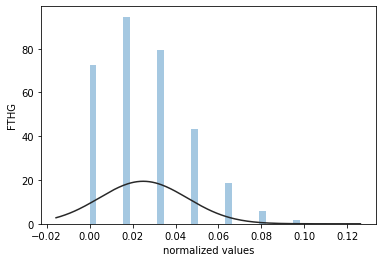

In [17]:
ax=sns.distplot(normalized_val, fit=norm, kde=False)
_=ax.set(xlabel='normalized values', ylabel='FTHG')

lets try by combining the integer columns into in dataframe.

In [18]:
df_integers=pd.DataFrame(df, columns=['FTHG','FTAG','HTHG', 'HTAG'])
df_integers

,FTHG,FTAG,HTHG,HTAG
0,2,0,NaN,NaN
1,1,3,NaN,NaN
2,0,5,NaN,NaN
3,1,2,NaN,NaN
4,2,0,NaN,NaN
...,...,...,...,...
953,3,0,1.0,0.0
954,2,2,0.0,1.0
955,0,0,0.0,0.0
956,1,0,1.0,0.0


Applying mapping on HTR to convert string values into integers.

https://seaborn.pydata.org/generated/seaborn.boxplot.html

Box plot shows the outlier and makes us understand that on which values the data doesnot depend, therefore, values at 6 and 7 are outliers as these are independent points so we can remove them.

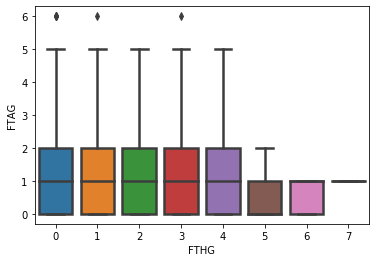

In [19]:
sns.boxplot(x=df_integers['FTHG'],y=df_integers['FTAG'], linewidth=2.5)

In [20]:
np.max(df_integers)

FTHG    7.0
FTAG    6.0
HTHG    5.0
HTAG    4.0
dtype: float64

This explains the boxplot, as values of 6 and 7 are very less that is why they have independent boxes.

In [21]:
values(df_integers['FTHG'])

1    286
2    240
0    220
3    131
4     57
5     18
6      5
7      1
Name: FTHG, dtype: int64

To plot a distplot under seaborn we need to remove all the nan values or else it will show error.

* The reason I used bfill is that it will fill the null values backwords and I did not use mean because it was replacing the values with floating values which can't be realistic in terms of goals, whereas using ffill gives back null values.

In [22]:
df['HTHG']=remove_nullvals(df['HTHG'])
df['HTAG']=remove_nullvals(df['HTAG'])
df['HTR']=remove_nullvals(df['HTR'])

# Hypothesis 1

* The probability of winning of Liverpool is more when it plays in their home ground.

# Dataset - Where HomeTeam is Liverpool

In [23]:
df_Liverpool=df[df['HomeTeam']=='Liverpool']

This shows all the stats where hometeam is liverpool.

In [24]:
df_Liverpool

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,14/08/93,Liverpool,Sheffield Weds,2,0,1,0.0,0.0,D,1993-94
3,25/08/93,Liverpool,Tottenham,1,2,2,0.0,0.0,D,1993-94
4,28/08/93,Liverpool,Leeds,2,0,1,0.0,0.0,D,1993-94
6,12/9/1993,Liverpool,Blackburn,0,1,2,0.0,0.0,D,1993-94
9,2/10/1993,Liverpool,Arsenal,0,0,0,0.0,0.0,D,1993-94
...,...,...,...,...,...,...,...,...,...,...
948,3/3/2018,Liverpool,Newcastle,2,0,1,1.0,0.0,H,2017-18
950,17/03/18,Liverpool,Watford,5,0,1,2.0,0.0,H,2017-18
953,14/04/18,Liverpool,Bournemouth,3,0,1,1.0,0.0,H,2017-18
955,28/04/18,Liverpool,Stoke,0,0,0,0.0,0.0,D,2017-18


# FTR= 0,1,2 shows draw, win, lose respectively, we can clearly see that when liverpool play at home ground it wins most of the matches.

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

FacetGrid shows all the cases that Liverpool can form with full time result column and depicts it through graphs.

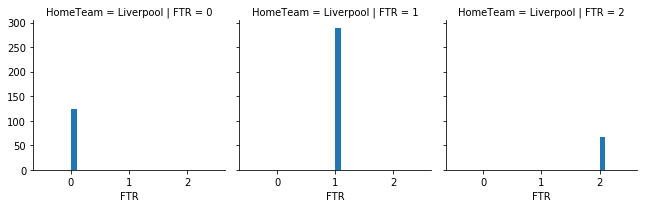

In [25]:
df_Liverpool[['HomeTeam', 'FTR']].groupby(['HomeTeam']).mean()
grid=sns.FacetGrid(df_Liverpool, col='FTR', row='HomeTeam')
grid.map(plt.hist, 'FTR')
grid.add_legend()

https://seaborn.pydata.org/generated/seaborn.distplot.html

The following bell curve gives us a confidence level of about 90%, hence we can decide our critical value and formulate z-test according to that.

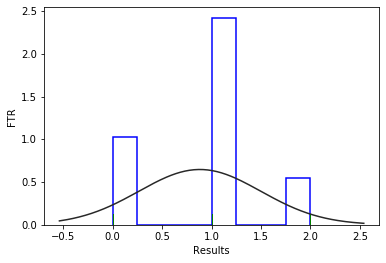

In [26]:
ax=sns.distplot(df_Liverpool['FTR'], rug=True,fit=norm,kde=False, rug_kws={"color": "g"},
                hist_kws={"histtype": "step", "linewidth": 1.5,
                          "alpha": 1, "color": "b"})
_=ax.set(xlabel='Results', ylabel='FTR')

setting values of liverpool fulltimeresult ftr and applying ztest to prove our hypothesis.

only taking the values where liverpool won matches.

In [27]:
df_Liverpool_wins=(df_Liverpool['FTR']==1)

In [28]:
df_Liverpool_losses=(df_Liverpool['FTR']==2)

In [29]:
df_Liverpool_draw=df_Liverpool['FTR']==0

https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

Mean of the values where liverpool won the matches

In [30]:
df_mean=df_Liverpool_wins.mean()
df_mean

0.605427974947808

frac=0.20 specifies that we are taking 20% of the values.

In [31]:
df_Liverpool_wins_sample=df_Liverpool_wins.sample(frac=0.40)

Mean of the 20% sampled values.

In [32]:
sample_mean=df_Liverpool_wins_sample.mean()
sample_mean

0.609375

Standard deviation of the values where Liverpool won the matches.

In [33]:
df_std=statistics.stdev(df_Liverpool_wins)
df_std

0.48926955902804464

Standard deviation of sampled values.

In [34]:
df_std_sample=statistics.stdev(df_Liverpool_wins_sample)
df_std_sample

0.4891660014385206

Assuming critical value = 1.65 as confidence level is 90%

In [35]:
critical_value=1.65
zscore=((sample_mean-df_mean)*math.sqrt(100))/df_std_sample #taking N=100 (for 100 samples)
print(zscore)

0.08068886718587885


Our null hypothesis is true as the zscore we got is less than our critical value, therefore liverpool wins more matches at their home ground.

# Hypothesis 2

* if a team either home or away has more goals before half time then it will win the match.

Columns to consider: HTR,HTHG,HTAG and if HTHG>HTAG then home team wins else Away team wins.

In [36]:
df_Half_Time=pd.DataFrame(df, columns=('HomeTeam', 'AwayTeam', 'HTHG', 'HTAG', 'FTR', 'HTR'))
df_Half_Time

,HomeTeam,AwayTeam,HTHG,HTAG,FTR,HTR
0,Liverpool,Sheffield Weds,0.0,0.0,1,D
1,QPR,Liverpool,0.0,0.0,2,D
2,Swindon,Liverpool,0.0,0.0,2,D
3,Liverpool,Tottenham,0.0,0.0,2,D
4,Liverpool,Leeds,0.0,0.0,1,D
...,...,...,...,...,...,...
953,Liverpool,Bournemouth,1.0,0.0,1,H
954,West Brom,Liverpool,0.0,1.0,0,A
955,Liverpool,Stoke,0.0,0.0,0,D
956,Chelsea,Liverpool,1.0,0.0,1,H


Mapping HTR values into integers.

In [37]:
df_Half_Time['HTR']=[mapping[i] for i in df['HTR']]
df_Half_Time.tail(10)

,HomeTeam,AwayTeam,HTHG,HTAG,FTR,HTR
948,Liverpool,Newcastle,1.0,0.0,1,1
949,Man United,Liverpool,2.0,0.0,1,1
950,Liverpool,Watford,2.0,0.0,1,1
951,Crystal Palace,Liverpool,1.0,0.0,2,1
952,Everton,Liverpool,0.0,0.0,0,0
953,Liverpool,Bournemouth,1.0,0.0,1,1
954,West Brom,Liverpool,0.0,1.0,0,2
955,Liverpool,Stoke,0.0,0.0,0,0
956,Chelsea,Liverpool,1.0,0.0,1,1
957,Liverpool,Brighton,2.0,0.0,1,1


The Facetgrid shows comparison of half time home team goals(HTHG) with half time result(HTR), it displays each possible outcome, for instance the first 3 graphs show that when HTHG is 0 there are 3 possible combinations and code has displayed all graphically. Therefore, HTHG =0 and HTR=0 has almost 350 values and shows a strong relation that if there are none goals scored in the first half then FTR or final time result will result in draw. Whereas, if more than one goal is scored by home team before half time then final result will go in favour of home team

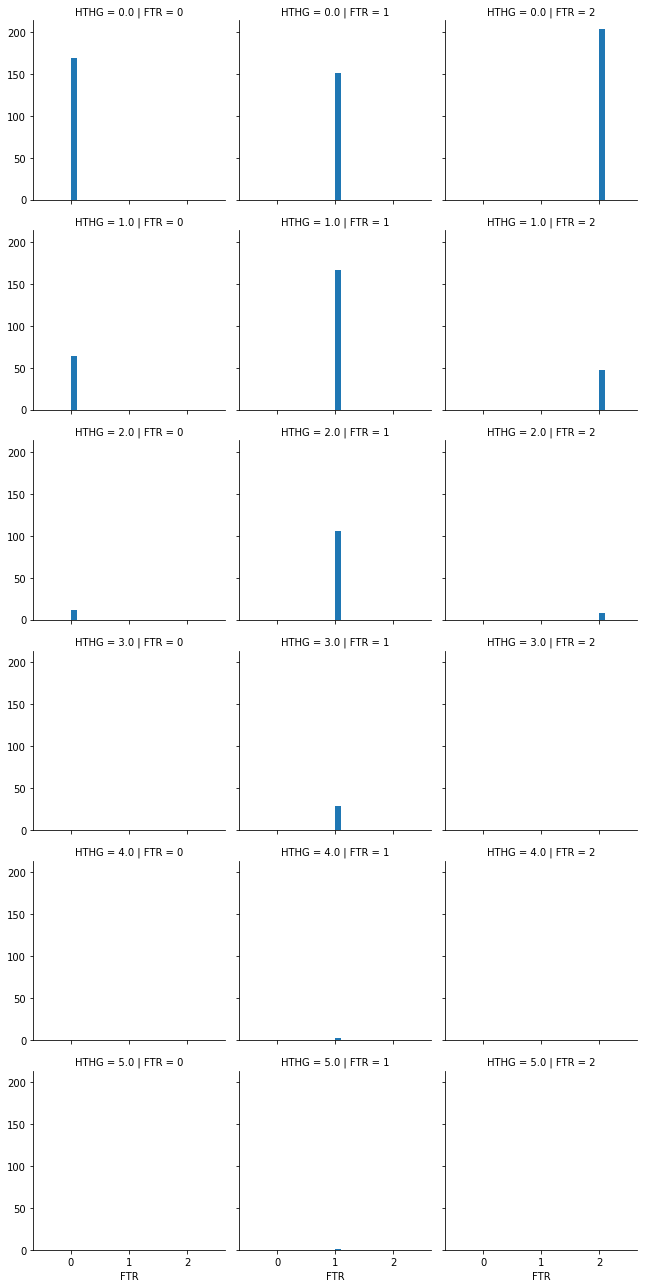

In [38]:
df_Half_Time[['HTHG', 'FTR']].groupby(['HTHG']).mean()
grid=sns.FacetGrid(df_Half_Time, col='FTR', row='HTHG')
grid.map(plt.hist, 'FTR')
grid.add_legend()

Similarly, the Facetgrid shows comparison of half time away team goals(HTHG) with half time result(HTR), it displays each possible outcome, for instance the first 3 graphs show that when HTAG is 0 there are 3 possible combinations and code has displayed all graphically. Therefore, HTHG =0 and HTR=1 has almost 400 values and shows a strong relation that if there is one goal scored in the first half then FTR or final time result will result in win for the home team as away team did not score any goal. Whereas, if more than one goal is scored by away team before half time then there is a chance that result will go in the favour of away team but chances are less as almost 100 values goes in favour of home team leaving only 120 for away team.

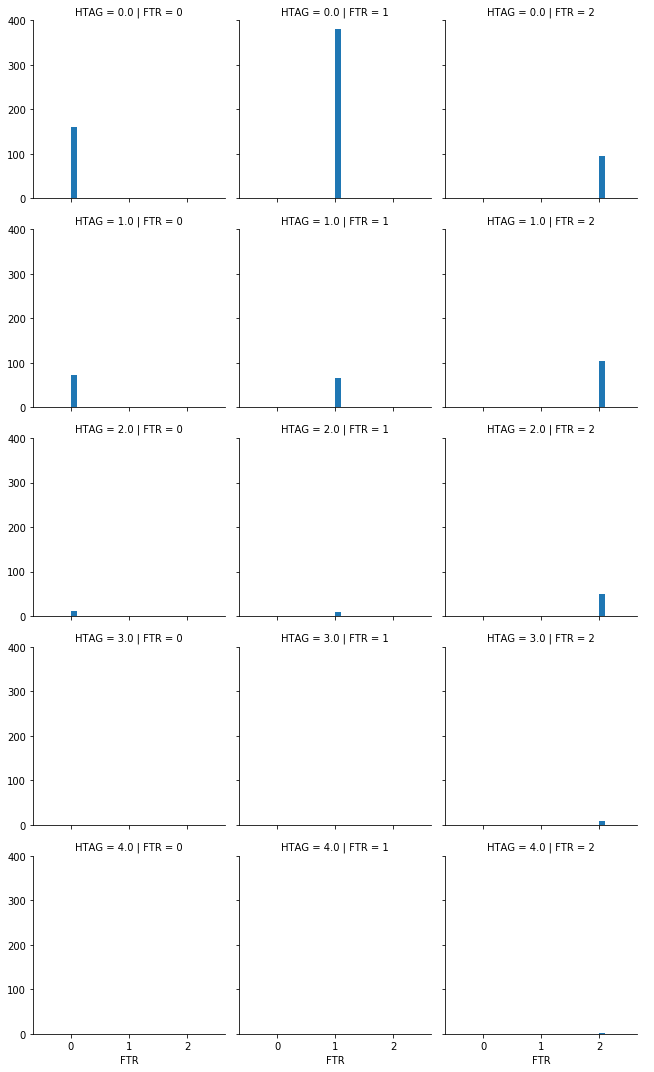

In [39]:
df_Half_Time[['HTAG', 'FTR']].groupby(['HTAG']).mean()
grid=sns.FacetGrid(df_Half_Time, col='FTR', row='HTAG')
grid.map(plt.hist, 'FTR')
grid.add_legend()

To just compare the win or lose I have taken HTR= 1 and 2 where 1 is where home team wins and 2 is where away team wins.

In [40]:
df_win_or_lose=df_Half_Time[(df_Half_Time['HTR']==1)| (df_Half_Time['HTR']==2)]

In [41]:
df_win_or_lose

,HomeTeam,AwayTeam,HTHG,HTAG,FTR,HTR
86,Tottenham,Liverpool,0.0,2.0,2,2
87,Liverpool,QPR,1.0,0.0,1,1
88,Wimbledon,Liverpool,1.0,0.0,1,1
89,Liverpool,Blackburn,3.0,0.0,1,1
90,Liverpool,Bolton,2.0,0.0,1,1
...,...,...,...,...,...,...
951,Crystal Palace,Liverpool,1.0,0.0,2,1
953,Liverpool,Bournemouth,1.0,0.0,1,1
954,West Brom,Liverpool,0.0,1.0,0,2
956,Chelsea,Liverpool,1.0,0.0,1,1


# Violin plot compares two values, here it will be comparing win and loss of two columns that are HTHG and HTAG.

x axis shows HTHG and y axis depicts HTAG, results are interpreted like: if value on x axis is 0 and on y it is 1 then plot shifts towards right and is colored red that is color of loss, that brings us to our hypothesis, therefore if team on x axis has lower goals then it will loose and vis-a-verse.

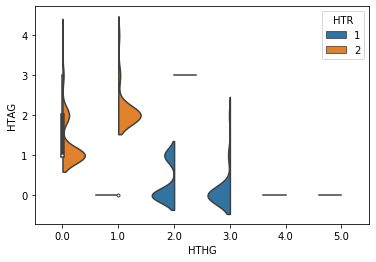

In [42]:
sns.violinplot("HTHG","HTAG", hue='HTR',data=df_win_or_lose,split=True)
sns.set(rc={'figure.figsize':(21,9)})

# Hence Hypothesis 2 is true.

In [45]:
df1=pd.read_csv('liverpool-fc-stats-from-19932018.zip')

FileNotFoundError: [Errno 2] No such file or directory: 'liverpool-fc-stats-from-19932018.zip'